In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

import pickle

FILENAME = "C:\\Users\\Krishna\\Downloads\\tuning_3.4.pickle"

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

data

{'neuron4': array([[18.1, 12.1,  6. , ..., 26.7, 25.4, 23.1],
        [17.4, 14.8,  6.7, ..., 27.3, 27. , 25.4],
        [17.6, 14.8,  7.6, ..., 29.4, 26.2, 22.9],
        ...,
        [20.1, 12.8,  7.6, ..., 25.3, 26.5, 24.3],
        [18.1, 12.3,  7.4, ..., 26.3, 27. , 23.9],
        [17.9, 15.3,  6.4, ..., 26.2, 26.8, 25. ]]),
 'stim': array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
        330., 345.]),
 'neuron3': array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]),
 'neuron2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

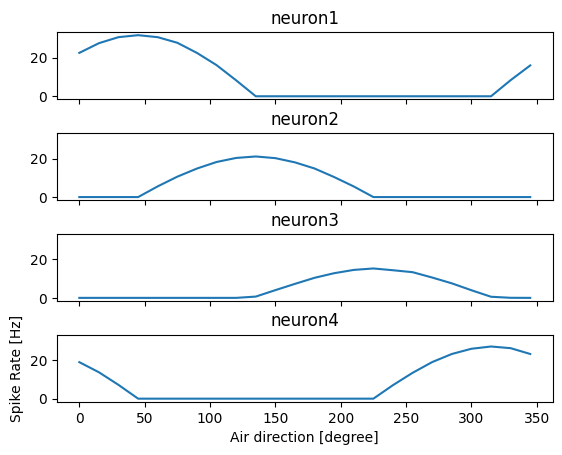

In [5]:
stim = data['stim']
neurons = ['neuron1', 'neuron2', 'neuron3', 'neuron4']

f, ax = plt.subplots(len(neurons), 1, sharex=True, sharey=True)
for i, n in enumerate(neurons):
    ax[i].plot(stim, data[n].mean(axis=0))
    ax[i].set_title(n)

plt.xlabel('Air direction [degree]')
plt.ylabel('Spike Rate [Hz]')
f.subplots_adjust(hspace=0.5)
plt.show()

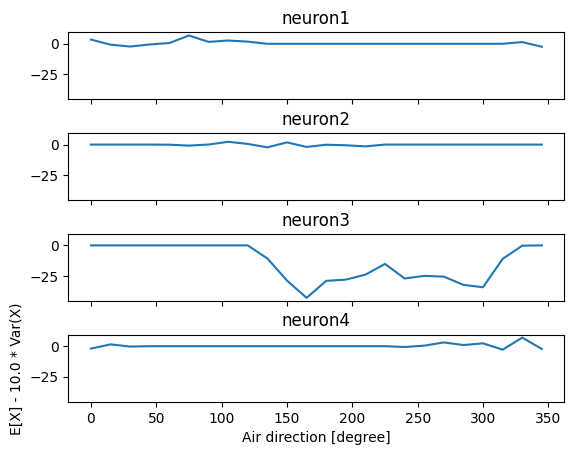

In [6]:
a = 10.0 # 10Hz
# As mentioned in the hint above
# a E[X] = a**2 Var(X) -> E[x] = a Var(X)
# So test for diversions from the similarity
f, ax = plt.subplots(len(neurons), 1, sharex=True, sharey=True)
for i, n in enumerate(neurons):
    y = data[n].mean(axis=0) - a * data[n].var(axis=0)
    ax[i].plot(stim, y)
    ax[i].set_title(n)

plt.xlabel('Air direction [degree]')
plt.ylabel('E[X] - 10.0 * Var(X)')
f.subplots_adjust(hspace=0.5)
plt.show()

In [1]:

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

import pickle

FILENAME = "C:\\Users\\Krishna\\Downloads\\pop_coding_3.4.pickle"

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
data

{'c1': array([0.70710678, 0.70710678]),
 'r1': array([11.9, 12.8, 13.9, 12.1, 11.3, 12.2, 12.9, 12.4, 13.2, 10.7]),
 'r3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'c2': array([ 0.70710678, -0.70710678]),
 'c3': array([-0.70710678, -0.70710678]),
 'r2': array([18.8, 18. , 19. , 19.1, 18.1, 21.5, 20.3, 21.2, 18.6, 20.4]),
 'c4': array([-0.70710678,  0.70710678]),
 'r4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [2]:
c = [data['c1'], data['c2'], data['c3'], data['c4']]
r = [data['r1'], data['r2'], data['r3'], data['r4']]

In [3]:

basis_vector = []
for rr, cc in zip(r, c):
    # Calculate the weighted basis vector
    nr = rr / rr.max()
    mean_vector = np.outer(nr, cc).mean(axis=0)

    # Normalize the vector
    mean_vector /= np.sqrt(np.inner(mean_vector, mean_vector))

    basis_vector.append(mean_vector)

C:\Users\Krishna\AppData\Local\Temp\ipykernel_26992\1389750686.py:4: RuntimeWarning: invalid value encountered in divide
  nr = rr / rr.max()


In [4]:
print('Weighted basis vectors: %s' % basis_vector)

# Only take the first two, because the rest are nan
pop_vector = np.nansum(basis_vector, axis=0)
pop_vector /= np.sqrt(np.inner(pop_vector, pop_vector))

print('Population Vector (X, Y): %s' % pop_vector)
print('Population vector in polar coordinates: %f' % np.arctan(pop_vector[1]/pop_vector[0]))

Weighted basis vectors: [array([0.70710678, 0.70710678]), array([ 0.70710678, -0.70710678]), array([nan, nan]), array([nan, nan])]
Population Vector (X, Y): [1. 0.]
Population vector in polar coordinates: 0.000000
